# 1. K-NN classifier

**Question** How does the k-nn algorithm work? **It assign class for each test sample by chosing the one with most occurances within k closest neighbours in some multidimensional space**

**Question** What are the parameters we need to choose to classify with k-NN? How can we choose them? **k which represents the number of neighbours. We can choose them by testing model performance on test set with given k, e.g. by using cross validation**

**Question** What are the advantages and disadvantages of this algorithm? For which kind of dataset it would be appropriate and for which datasets it wouldn't? One of the advantages might be simplicity of solution and disadvantage might be for example complexity and susceptibility to the curse of dimensionality when having a lot of features. We can use it when there are "hard" distribution of samples in classes and it is not really advisable to choose this model for large datasets because of complexity.

**Question** How can we deal with nominal values in distance measurement? With usage of encoders, such as for example one-hot-encoder or ordinal-encoder.




In further part of the laboratory, we will perform a preprocessing of the data and a classification of a set of biomedical voice measurements. Some of them has been recorded for people with Parkinson's desease.

More about the dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons

First, we load the required packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

# 2. Data loading and analysis of the attributes
Let's start with the data preparation, 
#### 2.1. Load the dataset from file parkinsons.csv into data frame using library pandas (pd.read_csv). Write the body of the read_data function to return a data frame with attributes and a list with class labels. Classes are available in 'status' column. You should also remove column 'name' from the data (see function drop of dataFrame https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [2]:
def read_data(path):
    df = pd.read_csv(path)
    X, y = df.drop(['name','status'], axis=1), df['status']
    return X, y

data_X, data_Y = read_data("parkinsons.data")

Let's see what we have loaded.

In [3]:
data_X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data_Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

#### 1.2. Let's analyse the given data. 
* How many attributes are in given data?  - len(df.columns)
* Are the attributes on the common scale? - No
* Are observations equally distributed for sick and healthy people? - Not particulary

Plot the histogram of the assigned class and analyse the distribution.


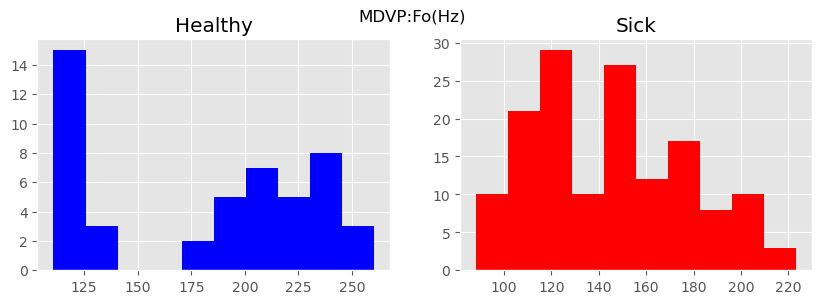

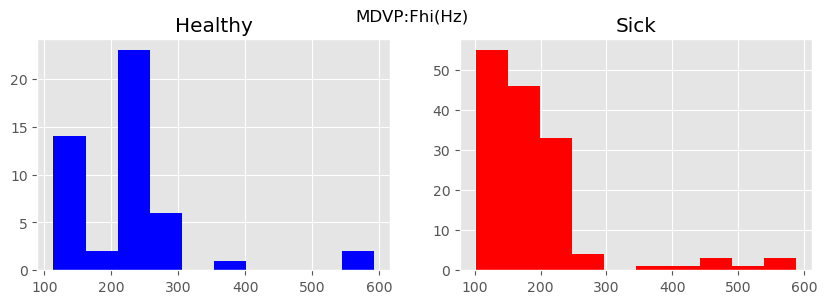

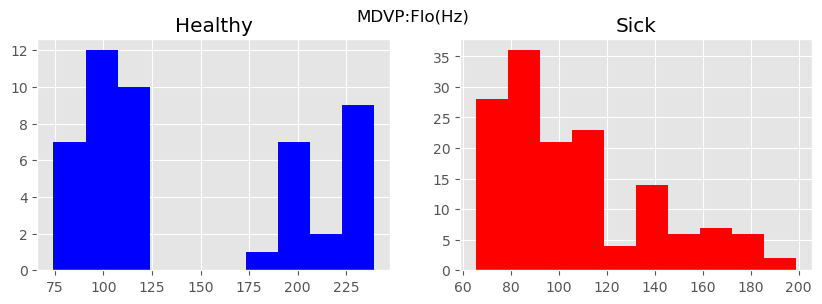

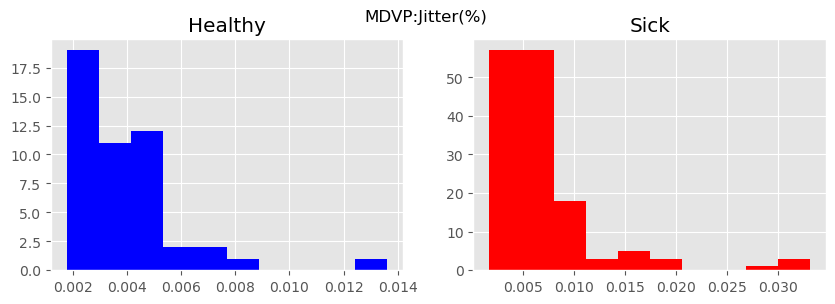

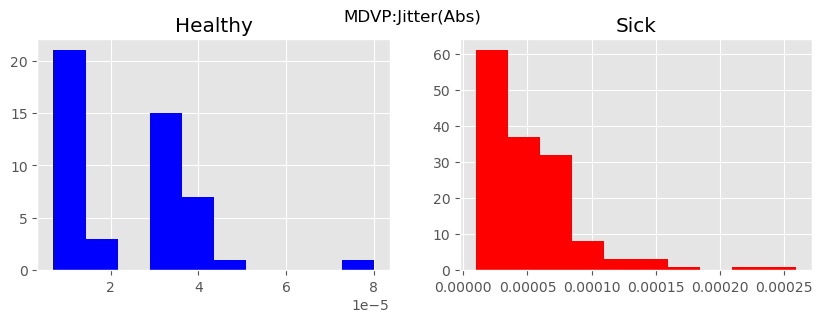

In [5]:
plt.style.use('ggplot')
attributes = data_X.columns[:5]
for attr in attributes:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
    ax[0].hist(data_X[attr][data_Y==0], color='blue')
    ax[0].set_title('Healthy')
    ax[1].hist(data_X[attr][data_Y==1], color='red')
    ax[1].set_title('Sick')
    fig.suptitle(attr)
    plt.show()

Plot the histograms of the first 5 attributes. 

# 3. Train and test set selection

#### We want to build our classifier and test it on another set of observations.

To split data into train and test sets use train_test_split method from sklearn.model_selection module (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Use 80% of cases in train set and 20% in test set. 
Use random_state = 5 just to be sure we all have the same rows in train and test sets :)

split_data should return a tuple containing: dataframe with train set attributes, list of labels for train data, dataframe with test set attributes and a list of labels for test data.

In [6]:
def split_data(data_X, data_Y, test_percent = 20, random_state=5):
    test_size = int(test_percent * len(data_Y) / 100)
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=test_size, random_state=random_state)
    return X_train, y_train, X_test, y_test
    
(X_train, y_train, X_test, y_test) = split_data(data_X, data_Y)
print("rows in train set: ", X_train.shape[0])
print("rows in test set:", X_test.shape[0])

rows in train set:  156
rows in test set: 39


# 4. Data standarization/normalization
#### 4.1. Use k-nn algorithm to classify the obtained test set using k=3. What is the accuracy of the classification?

Use KNeighborsClassifier class from sklearn.neighbors module. Useful methods: fit and predict. Classification accuracy can be obtained with accuracy_score method from sklearn.metrics. Function get_classification_accuracy should return the accuracy of classification of given test set on model build with train set.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [7]:
def get_classification_accuracy(train_data_X, test_data_X, train_data_Y, test_data_Y, k = 3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data_X, train_data_Y)
    pred = knn.predict(np.array(test_data_X))
    score = metrics.accuracy_score(test_data_Y, pred)
    return score

get_classification_accuracy(X_train, X_test, y_train, y_test)

/home/kamil/miniconda3/envs/data-science/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.7692307692307693

#### 4.2. Perform some normalization or standarization of attributes. Then repeat the classification. Do the classification accuracy change?

You can use sklearn.preprocessing.StandardScaler, sklearn.preprocessing.MinMaxScaler or sklearn.preprocessing.MaxAbsScaler and their fit_transform/transform methods.

Try other standarization methods to verify the standarization procedure influence the classification accuracy.
standarize_train_and_test should return 2 dataFrames - with normalized train and normalized test sets.

In [8]:
def standarize_train_and_test(train_X, test_X):
    scaler = StandardScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)
    return train_X, test_X

X_train_norm, X_test_norm = standarize_train_and_test(X_train, X_test)
get_classification_accuracy(X_train_norm, X_test_norm, y_train, y_test)

0.9743589743589743

# 5. Choosing k value
Using obtained in previous exercices train set with normalization/standarization use k-nn algoritm using k from 1 to 20. Use 5-fold cross-validation within the train set to obtain the classification accuracy. Plot the obtained accuracy of the classification. Which k value seems to be the best for the given dataset?

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html for more info about cross validation in sklearn.

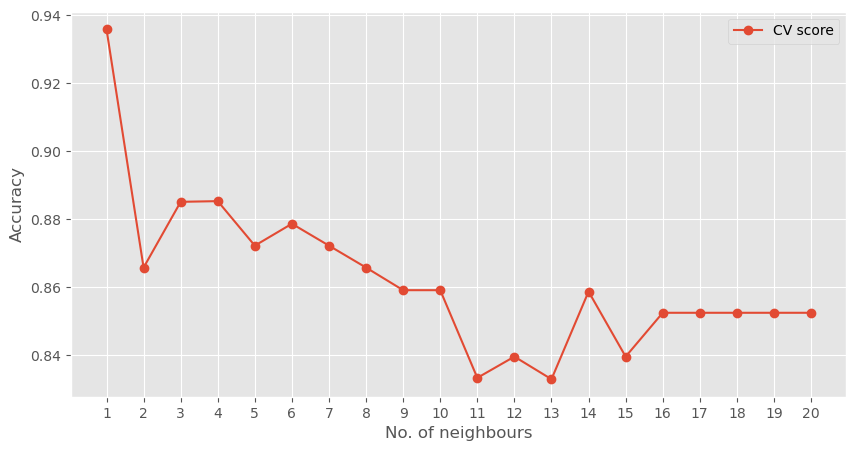

1

In [9]:
def choose_k(train_X, test_X, train_Y, test_Y, max_k=20, cv=5, verbose=True):

    cv_scores = []
    k_values = np.arange(1, max_k+1)

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        cv_accuracy = np.mean(cross_validate(knn, train_X, train_Y, cv=cv)['test_score'])
        cv_scores.append(cv_accuracy)
                
    if verbose:
        plt.figure(figsize=(10,5))
        plt.plot(k_values, cv_scores, '-o', label='CV score')
        plt.xticks(k_values)
        plt.ylabel('Accuracy')
        plt.xlabel('No. of neighbours')
        plt.legend()
        plt.show()
    
    best_k = np.argmax(np.array(cv_scores)) + 1
    return best_k
    
best_k = choose_k(X_train_norm, X_test_norm, y_train, y_test)
best_k

# 6. Testing classifier
Train the k-NN classifier again and test it using the obtained best k value on a test set to check the final classification accuracy. You can just call the previous written function get_classification_accuracy)

In [10]:
get_classification_accuracy(X_train_norm, X_test_norm, y_train, y_test, k=best_k)

0.9743589743589743

# 7. Homework
You are given a dataset containing information about 1600 red wines (winequality.csv) containing 11 attributes and assignment to one of the three wine quality classess: "poor", "medium" and "good". Perform a preprocessing of this dataset (normalization, standardization). Divide this set into the train and test sets. Choose experimentally the best value of k (using cross-validation) and perform classification using the  k-nn algoritm with the chosen k value. Write a report containing information about the used preprocessing methods, chosen train/test split method (percentage of examples in train/test sets, if shuffling or stratification used), plot of the accuracy depending of k parameter, finally chosen k and obtained classification accuracy on a test set.

**Deadline +2 weeks**
    
    

In [11]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,poor
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,poor
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,poor
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,poor


In [12]:
from sklearn.preprocessing import LabelEncoder

# Label encoder is used for target variable
# poor, medium, good - 0, 1, 2

X, y = df.drop(['quality'], axis=1), df['quality']
y = np.array(y).reshape(-1)
enc = LabelEncoder()
y = enc.fit_transform(y).astype('int')
y

array([2, 2, 2, ..., 1, 2, 1])

In [13]:
X.shape, y.shape

((1599, 11), (1599,))

In [14]:
# r_state = 0
# best_score = 0
# for r in range(60):
#     X_train, y_train, X_test, y_test = split_data(X, y, random_state=r)
#     X_train, X_test = standarize_train_and_test(X_train, X_test)
#     best_k = choose_k(X_train, X_test, y_train, y_test, verbose=0)
#     score = get_classification_accuracy(X_train, X_test, y_train, y_test, k=best_k)
#     if score > best_score:
#         r_state = r
#         best_score = score

In [15]:
r_state = 5 # just to compare final results

- Train split is used with the same function as it was during labs - test_percentage is by default 20, it is shuffled and splitted in stratified fashion (by default). <br>
- Normalization is performed with the same function as it was during laboratories - we use MinMaxScaler <br>
- We choose the best k with cross-validation

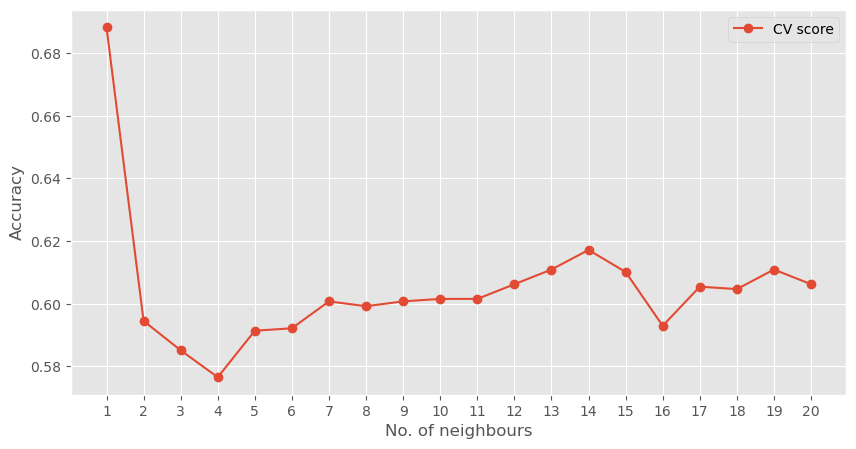

(1, 0.664576802507837)

In [16]:
X_train, y_train, X_test, y_test = split_data(X, y, random_state=r_state)
X_train, X_test = standarize_train_and_test(X_train, X_test)
best_k = choose_k(X_train, X_test, y_train, y_test, verbose=1)

best_k, get_classification_accuracy(X_train, X_test, y_train, y_test, k=best_k)